## Under Sampling with AllKNN Method

# All KNN

- Adapts the functionality of Edited Nearest Neighbours in that, at each round, it increases the number of neighbours utilised to exclude or retain the observations. 
- It starts by looking at the 1 closest neighbour. 
- It finishes at a maximum number of neighbours to examine, determined by the user
- it stops prematurely if the majority class becomes the minority


AllKNN is a repetition of ENN, starting by examining the 1 closest neighbour and increasing the neighbourhood by 1 at each round.

The repetitions stop after examining the maximum number of neighbours entered by the user, or when a class disappears or becomes the minority, whatever happens first.

Adding a neighbour at each iteration makes the criteria for a sample to be retained harder and harder, therefore removing more observations that are closer to the boundary to the minority class.

In this notebook, we will compare ENN, RENN, and AllKNN.

In [134]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# from sklearn
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# for metrics
from sklearn.metrics import roc_auc_score

# from imblearn
from imblearn.under_sampling import (
    EditedNearestNeighbours,
    RepeatedEditedNearestNeighbours,
    AllKNN
)

## create simulated data

In [135]:
def create_data(sep):
    
    X,y = make_classification(n_samples=1000,
                              n_features=2,
                              n_redundant=0,
                              n_clusters_per_class=1,
                              weights=[0.99],
                              class_sep=sep,
                              random_state=1)
    
    X = pd.DataFrame(X, columns=['varA','varB'])
    y = pd.Series(y)
    
    return X,y

## resample using OneSidedSelection method

In [136]:
# lets generate data when sep = 2
X,y = create_data(sep=2)

In [137]:
X.shape, y.shape

((1000, 2), (1000,))

In [138]:
y.value_counts()

0    983
1     17
dtype: int64

In [139]:
aknn = AllKNN(sampling_strategy='auto', # removes from the majority class
                              n_neighbors=3,            # setting the nearest neighbours count
                              kind_sel='all',           # removing strategy -- set to all -- all observations must agree
                              n_jobs=2)      # this sets the maximum no of iterations

X_res, y_res = aknn.fit_resample(X,y)
print('Resample Data Shapes: ')
print(X_res.shape, y_res.shape)
print('Value Counts: ')
print(y_res.value_counts())

Resample Data Shapes: 
(970, 2) (970,)
Value Counts: 
0    953
1     17
dtype: int64


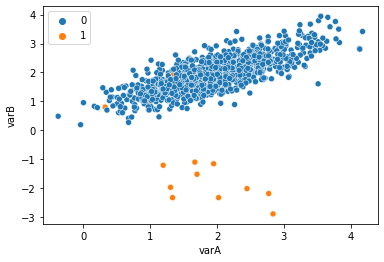

In [100]:
# original data plot
sns.scatterplot(data=X, x = 'varA', y ='varB', hue=y)
plt.show()

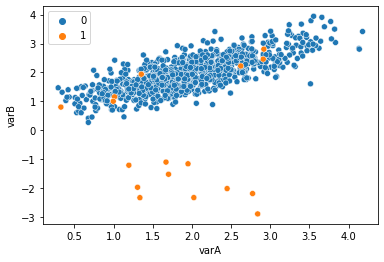

In [140]:
# under sampled data plot
sns.scatterplot(data=X_res, x = 'varA', y ='varB', hue=y_res)
plt.show()

- We can see some reduction in the majority class observations.
- Also, we the minority observations which lies in the middle of the majority ones becomes more visible as the near neighbours of the majority observations are removed

## Lets check for a partially separated class

In [141]:
X,y = create_data(sep=0)

In [142]:
aknn = AllKNN(sampling_strategy='auto', # removes from the majority class
                              n_neighbors=3,            # setting the nearest neighbours count
                              kind_sel='all',           # removing strategy -- set to all -- all observations must agree
                              n_jobs=2)

X_res, y_res = aknn.fit_resample(X,y)
print('Resample Data Shapes: ')
print(X_res.shape, y_res.shape)
print('Value Counts: ')
print(y_res.value_counts())

Resample Data Shapes: 
(947, 2) (947,)
Value Counts: 
0    930
1     17
dtype: int64


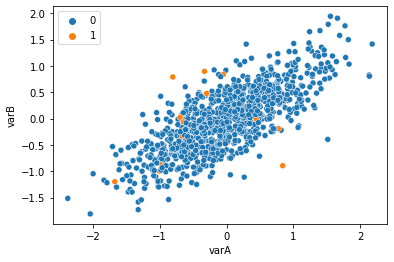

In [144]:
# original data plot
sns.scatterplot(data=X, x = 'varA', y ='varB', hue=y)
plt.show()

# we can very less separation and much overlapped since we provide a lower seperation value 

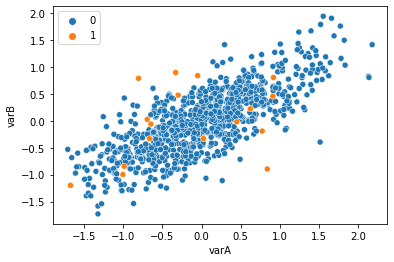

In [143]:
# under sampled data plot
sns.scatterplot(data=X_res, x = 'varA', y ='varB', hue=y_res)
plt.show()

- Here, we can see more number of oberservations of majority class are removed as the observations are closer.

## Different KNN values
### with mode = 'all'

In [146]:
def create_resampled_data(knn,X,y):
    aknn = AllKNN(sampling_strategy='auto', # removes from the majority class
                              n_neighbors=knn,            # setting the nearest neighbours count
                              kind_sel='all',           # removing strategy -- set to all -- all observations must agree
                              n_jobs=2)

    X_res, y_res = aknn.fit_resample(X,y)
    print('Resample Data Shapes for knn = {}'.format(knn))
    print(X_res.shape, y_res.shape)
    print('Value Counts: ')
    print(y_res.value_counts())

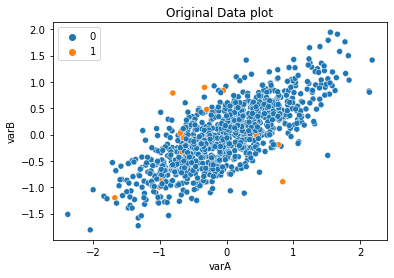

Resample Data Shapes for knn = 1
(979, 2) (979,)
Value Counts: 
0    962
1     17
dtype: int64


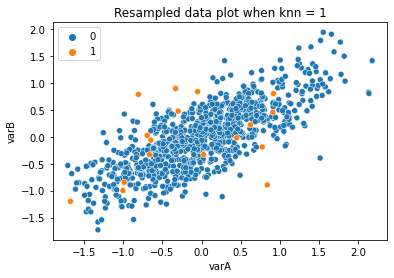

Resample Data Shapes for knn = 2
(966, 2) (966,)
Value Counts: 
0    949
1     17
dtype: int64


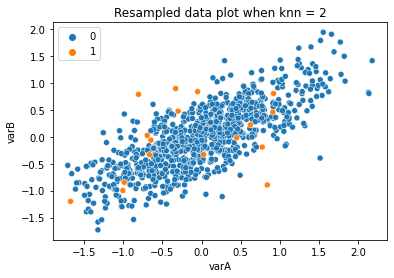

Resample Data Shapes for knn = 3
(947, 2) (947,)
Value Counts: 
0    930
1     17
dtype: int64


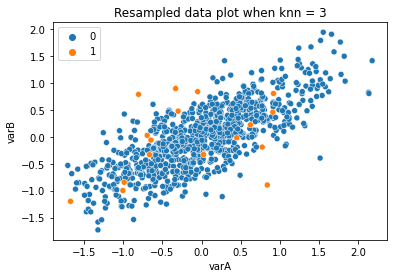

Resample Data Shapes for knn = 4
(932, 2) (932,)
Value Counts: 
0    915
1     17
dtype: int64


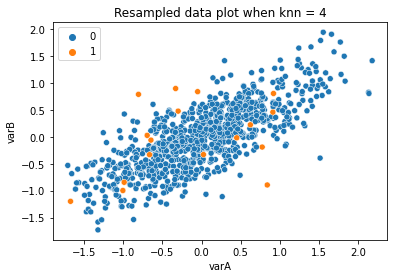

In [147]:
# when sep = 0
X, y = create_data(sep=0)

# original data plot
sns.scatterplot(data=X, x = 'varA', y ='varB', hue=y)
plt.title('Original Data plot')
plt.show()

for i in range(1,5):
    create_resampled_data(i,X,y)    
    # resampled data plot
    sns.scatterplot(data=X_res, x = 'varA', y ='varB', hue=y_res)
    plt.title('Resampled data plot when knn = {}'.format(i))
    plt.show()
    

- We can see the reduction of observations count in the under sampled data is more with higher knn values

### with mode = 'mode'
- When most of the neighbours agree or matched with the observation in check

In [149]:
aknn = AllKNN(sampling_strategy='auto', # removes from the majority class
                              n_neighbors=3,            # setting the nearest neighbours count
                              kind_sel='mode',           # removing strategy -- set to all -- all observations must agree
                              n_jobs=2)

X_res, y_res = renn.fit_resample(X,y)
print('Resample Data Shapes: ')
print(X_res.shape, y_res.shape)
print('Value Counts: ')
print(y_res.value_counts())

Resample Data Shapes: 
(997, 2) (997,)
Value Counts: 
0    980
1     17
dtype: int64


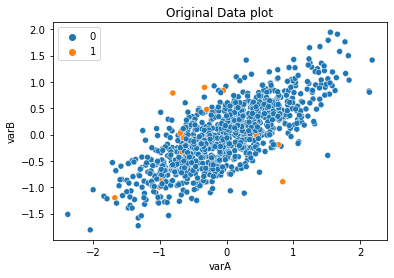

Resample Data Shapes for knn = 1
(979, 2) (979,)
Value Counts: 
0    962
1     17
dtype: int64


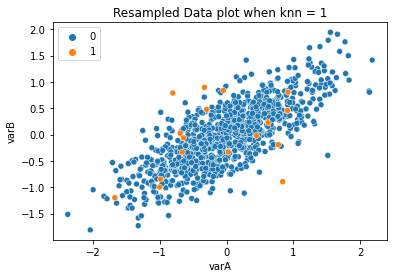

Resample Data Shapes for knn = 2
(966, 2) (966,)
Value Counts: 
0    949
1     17
dtype: int64


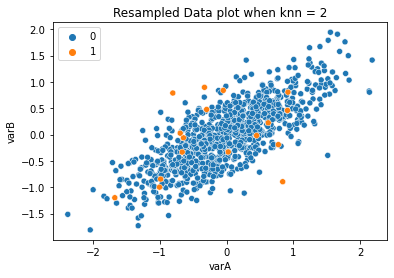

Resample Data Shapes for knn = 3
(947, 2) (947,)
Value Counts: 
0    930
1     17
dtype: int64


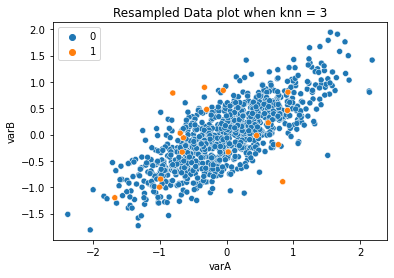

Resample Data Shapes for knn = 4
(932, 2) (932,)
Value Counts: 
0    915
1     17
dtype: int64


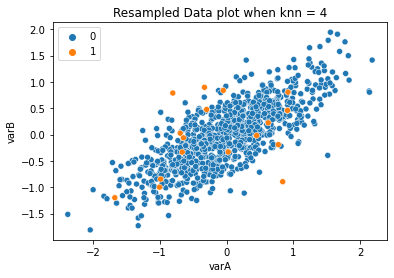

In [150]:
# when sep = 0
X, y = create_data(sep=0)

# original data plot
sns.scatterplot(data=X, x = 'varA', y ='varB', hue=y)
plt.title('Original Data plot')
plt.show()

for i in range(1,5):
    create_resampled_data(i,X,y)    
    # resampled data plot
    sns.scatterplot(data=X_res, x = 'varA', y ='varB', hue=y_res)
    plt.title('Resampled Data plot when knn = {}'.format(i))
    plt.show()
    

- dont see much difference.

## Working on a real data

In [151]:
# sampling to only 10000 observations to speed up the computation
df = pd.read_csv('kdd2004.csv').sample(10000)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,target
141950,65.16,24.75,-1.28,-19.0,21.0,1129.4,0.37,-1.43,-8.0,-50.0,...,1311.1,-0.09,-0.43,4.0,-52.0,367.6,1.61,0.32,0.37,-1
6326,58.41,25.00,0.43,8.0,-11.5,900.0,-0.74,1.91,30.5,-69.5,...,872.9,-0.95,1.40,-8.0,-40.0,213.7,0.59,0.52,0.58,-1
567,51.00,29.41,1.49,31.5,-19.5,1157.0,-0.60,0.35,-10.5,-58.5,...,1315.3,-0.97,0.62,4.0,-31.0,222.0,-0.08,0.33,-0.08,-1
117834,63.87,27.27,0.33,-4.0,-20.5,1418.5,0.07,-0.95,-16.5,-60.5,...,1276.9,-0.34,-1.36,7.0,-40.0,272.5,2.03,-0.07,-0.59,-1
119292,38.83,25.00,0.98,-17.5,0.0,1215.8,-1.03,0.18,-21.0,-52.5,...,850.4,0.19,0.41,5.0,-35.0,293.2,0.58,0.62,0.59,-1


In [112]:
df.shape

(10000, 75)

In [152]:
# check the target values ratios
df['target'].value_counts()

-1    9917
 1      83
Name: target, dtype: int64

In [153]:
df['target'].value_counts()/len(df)

-1    0.9917
 1    0.0083
Name: target, dtype: float64

## split the data

In [154]:
X_train, X_test, y_train,y_test = train_test_split(df.drop('target', axis = 1),
                                                  df['target'],
                                                  test_size=0.3,
                                                  random_state=0)
X_train.shape, X_test.shape

((7000, 74), (3000, 74))

In [155]:
# now lets prepare our under resampled data sets - for EditedNearestNeighbours
enn = EditedNearestNeighbours(sampling_strategy='auto', # removes from the majority class
                              n_neighbors=5,            # setting the nearest neighbours count
                              kind_sel='all',           # removing strategy -- set to all -- all observations must agree
                              n_jobs=2)

X_enn, y_enn = enn.fit_resample(X_train, y_train)
X_enn.shape, y_enn.shape

((6907, 74), (6907,))

In [156]:
# now lets prepare our under resampled data sets - RepeatedEditedNearestNeighbours
renn = RepeatedEditedNearestNeighbours(sampling_strategy='auto', # removes from the majority class
                              n_neighbors=5,            # setting the nearest neighbours count
                              kind_sel='all',           # removing strategy -- set to all -- all observations must agree
                              n_jobs=2,
                                     max_iter=100)

X_renn, y_renn = renn.fit_resample(X_train, y_train)
X_renn.shape, y_renn.shape

((6894, 74), (6894,))

In [157]:
# now lets prepare our under resampled data sets - AllKNN
aknn = AllKNN(sampling_strategy='auto', # removes from the majority class
                              n_neighbors=5,            # setting the nearest neighbours count
                              kind_sel='all',           # removing strategy -- set to all -- all observations must agree
                              n_jobs=2)

X_aknn, y_aknn = aknn.fit_resample(X_train, y_train)
X_aknn.shape, y_aknn.shape

((6898, 74), (6898,))

In [158]:
# shapes of the data
X_enn.shape, X_renn.shape, X_aknn.shape

((6907, 74), (6894, 74), (6898, 74))

## plot and compare

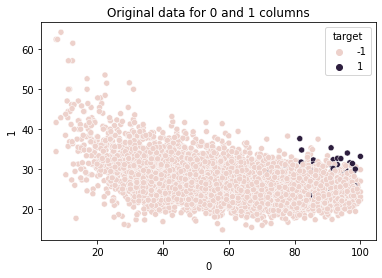

In [159]:
# original dataset

sns.scatterplot(data= X_train, x='0', y = '1', hue=y_train)
plt.title('Original data for 0 and 1 columns')
plt.show()

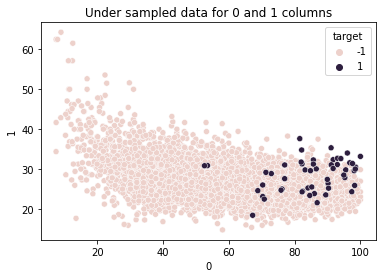

In [160]:
# onesided under sampled dataset

sns.scatterplot(data= X_enn, x='0', y = '1', hue=y_enn)
plt.title('Under sampled data for 0 and 1 columns')
plt.show()

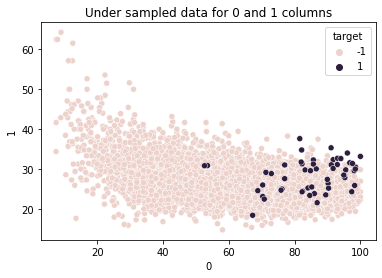

In [161]:
# onesided under sampled dataset

sns.scatterplot(data= X_renn, x='0', y = '1', hue=y_renn)
plt.title('Under sampled data for 0 and 1 columns')
plt.show()

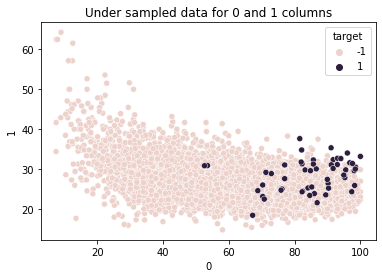

In [162]:
# onesided under sampled dataset

sns.scatterplot(data= X_aknn, x='0', y = '1', hue=y_aknn)
plt.title('Under sampled data for 0 and 1 columns')
plt.show()

- Can't see much difference in the plot as lesser observations are removed from the majority class and the resampled data are pretty much the same

## Model performance on original and condensed resample data

In [163]:
def create_randomForest(X_train, X_test, y_train, y_test):
    rf = RandomForestClassifier(n_estimators=200,
                                n_jobs=2,
                                random_state=39,
                                max_depth=4)
    
    rf.fit(X_train, y_train)
    probs_train = rf.predict_proba(X_train)
    probs_test = rf.predict_proba(X_test)
    
    # get metrics
    print('roc auc score for train data: {}'.format(roc_auc_score(y_train, probs_train[:,1])))
    print('roc auc score for test data: {}'.format(roc_auc_score(y_test, probs_test[:,1])))

In [164]:
# for Original DataSet
create_randomForest(X_train, X_test, y_train, y_test)

roc auc score for train data: 0.9984112749656792
roc auc score for test data: 0.9465552646160866


In [165]:
# for enn dataset
create_randomForest(X_enn, X_test, y_enn, y_test)

roc auc score for train data: 0.9994108735903047
roc auc score for test data: 0.9317626223666053


In [166]:
# for renn dataset
create_randomForest(X_renn, X_test, y_renn, y_test)

roc auc score for train data: 0.999241112585164
roc auc score for test data: 0.9439476743554363


In [167]:
# for aknn dataset
create_randomForest(X_aknn, X_test, y_aknn, y_test)

roc auc score for train data: 0.9986544641452617
roc auc score for test data: 0.9346146742141918


## On SVM classifier

In [168]:
def create_svc(X_train, X_test, y_train, y_test):
    
    svc = SVC(max_iter=1000, random_state=0, probability=True)
    
    svc.fit(X_train, y_train)
    probs_train = svc.predict_proba(X_train)
    probs_test = svc.predict_proba(X_test)
    
    # get metrics
    print('roc auc score for train data: {}'.format(roc_auc_score(y_train, probs_train[:,1])))
    print('roc auc score for test data: {}'.format(roc_auc_score(y_test, probs_test[:,1])))

In [169]:
# for original data
create_svc(X_train, X_test, y_train, y_test)

roc auc score for train data: 0.9513750498206457
roc auc score for test data: 0.9161007833635741


In [170]:
# for enn dataset
create_svc(X_enn, X_test, y_enn, y_test)

roc auc score for train data: 0.9508219716097178
roc auc score for test data: 0.9062245352513608


In [171]:
# for renn dataset
create_randomForest(X_renn, X_test, y_renn, y_test)

roc auc score for train data: 0.999241112585164
roc auc score for test data: 0.9439476743554363


In [172]:
# for aknn dataset
create_randomForest(X_aknn, X_test, y_aknn, y_test)

roc auc score for train data: 0.9986544641452617
roc auc score for test data: 0.9346146742141918


## Logistic Regression

In [173]:
def create_log(X_train, X_test, y_train, y_test):
    
    log = LogisticRegressionCV(max_iter=10000, random_state=0, solver='saga', n_jobs=2)
    
    log.fit(X_train, y_train)
    probs_train = log.predict_proba(X_train)
    probs_test = log.predict_proba(X_test)
    
    # get metrics
    print('roc auc score for train data: {}'.format(roc_auc_score(y_train, probs_train[:,1])))
    print('roc auc score for test data: {}'.format(roc_auc_score(y_test, probs_test[:,1])))

In [174]:
# for original data
create_log(X_train, X_test, y_train, y_test)

roc auc score for train data: 0.9245770780744874
roc auc score for test data: 0.9169808450765435


In [175]:
# for condensed dataset
create_log(X_enn, X_test, y_enn, y_test)

roc auc score for train data: 0.9251669191494137
roc auc score for test data: 0.9160138636882191


In [ ]:
# for renn dataset
create_randomForest(X_renn, X_test, y_renn, y_test)

In [ ]:
# for aknn dataset
create_randomForest(X_aknn, X_test, y_aknn, y_test)

- Overall model performance on the resampled data seems to be almost the same on the original data
- Random Forest performs better than the rest of the models, but not sure it is because of the under sampling or due to the randomness of the RF
- We can check with the 'mode' selection mode

- The model seems to perform almost the same for both the mode in our resampled data set.